In [1]:
import pandas as pd
import numpy as ny
data = pd.read_csv('1.csv')
data = data.loc[:, ~data.columns.str.contains('Unnamed')]
print(data.head())
# print(df.info())

       Exam1      Exam2  pass
0  31.602837  16.009573     0
1  42.412629  58.694390     0
2  76.011093  55.998458     1
3  97.178072  92.781250     1
4  65.314496  26.038323     0


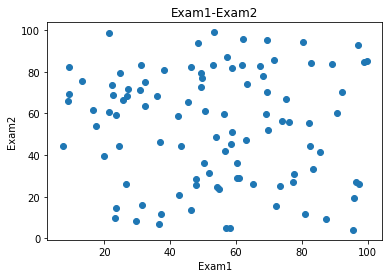

In [2]:
from matplotlib import pyplot as plt
fig1 = plt.figure()
plt.scatter(data.loc[:,'Exam1'],data.loc[:,'Exam2'])
plt.title("Exam1-Exam2")
plt.xlabel('Exam1')
plt.ylabel('Exam2')
plt.show()

In [3]:
#add label mask
mask = data.loc[:,'pass']==1
#print(~mask)
print(mask)

0     False
1     False
2      True
3      True
4     False
      ...  
95    False
96    False
97     True
98     True
99    False
Name: pass, Length: 100, dtype: bool


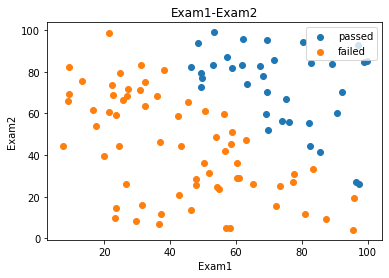

In [4]:
#通过的考生
fig2 = plt.figure()
passed = plt.scatter(data.loc[:,'Exam1'][mask],data.loc[:,'Exam2'][mask])
failed = plt.scatter(data.loc[:,'Exam1'][~mask],data.loc[:,'Exam2'][~mask])
plt.title("Exam1-Exam2")
plt.xlabel('Exam1')
plt.ylabel('Exam2')
plt.legend((passed,failed),("passed",'failed'))
plt.show()

In [5]:
#define x,y
x = data.drop(['pass'],axis=1)
y = data.loc[:,"pass"]
x1 = data.loc[:,"Exam1"]
x2 = data.loc[:,"Exam2"]
x.head()

,Exam1,Exam2
0,31.602837,16.009573
1,42.412629,58.694390
2,76.011093,55.998458
3,97.178072,92.781250
4,65.314496,26.038323


In [6]:
#establish the model and train it
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(x,y)

LogisticRegression()

In [7]:
#show the predicted result and its accuracy
y_predict  = LR.predict(x)
print(y_predict)

[0 0 1 1 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0
 0 1 0 1 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 1 1 0]


In [8]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y,y_predict)
print(accuracy)

1.0


In [9]:
y_test = LR.predict([[70,65]])
print('passed' if y_test==1 else 'failed')

passed


In [10]:
LR.intercept_

array([-108.77358909])

In [11]:
theta0 = LR.intercept_
theta1,theta2 = LR.coef_[0][0],LR.coef_[0][1]
print(theta0,theta1,theta2)

[-108.77358909] 0.9262928166694094 0.881050632206978


In [12]:
X2_new = -(theta0+theta1*x1)/theta2
print(X2_new)

0     90.233302
1     78.868425
2     43.544671
3     21.290762
4     54.790541
        ...    
95    66.826848
96    23.091965
97    50.503153
98    50.652056
99    98.718319
Name: Exam1, Length: 100, dtype: float64


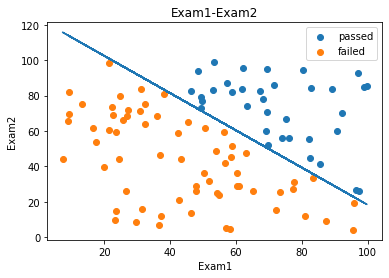

In [13]:
fig3 = plt.figure()

passed = plt.scatter(data.loc[:,'Exam1'][mask],data.loc[:,'Exam2'][mask])
failed = plt.scatter(data.loc[:,'Exam1'][~mask],data.loc[:,'Exam2'][~mask])
plt.plot(x1,X2_new)
plt.title("Exam1-Exam2")
plt.xlabel('Exam1')
plt.ylabel('Exam2')
plt.legend((passed,failed),("passed",'failed'))


plt.show()

In [14]:
x1_2 = x1*x1
x2_2 = x2*x2
x1_x2 = x1*x2


In [15]:
x_new = {"x1":x1,'x2':x2,'x1_2':x1_2,'x2_2':x2_2,'x1_x2':x1_x2}
x_new = pd.DataFrame(x_new)
print(x_new)

           x1         x2         x1_2         x2_2        x1_x2
0   31.602837  16.009573   998.739310   256.306420   505.947919
1   42.412629  58.694390  1798.831116  3445.031443  2489.383409
2   76.011093  55.998458  5777.686264  3135.827260  4256.503975
3   97.178072  92.781250  9443.577600  8608.360337  9016.302948
4   65.314496  26.038323  4265.983390   677.994267  1700.679947
..        ...        ...          ...          ...          ...
95  53.866069  48.480316  2901.553338  2350.341054  2611.444032
96  95.464843   4.106870  9113.536335    16.866380   392.061683
97  69.392479  70.501273  4815.316083  4970.429513  4892.258086
98  69.250848  59.756571  4795.679947  3570.847831  4138.193246
99  23.532248  14.547370   553.766689   211.625964   342.332309

[100 rows x 5 columns]


In [16]:
LR2 = LogisticRegression()
LR2.fit(x_new,y)

LogisticRegression()

In [17]:
y2_predict = LR2.predict(x_new)
accuracy2 = accuracy_score(y,y2_predict)
print(accuracy2)

1.0


In [24]:
import numpy as np
theta0 = LR2.intercept_
theta1,theta2,theta3,theta4,theta5 = LR2.coef_[0][0],LR2.coef_[0][1],LR2.coef_[0][2],LR2.coef_[0][3],LR2.coef_[0][4]

a = theta4
b = theta5
c = theta0 +theta1 +theta3*x1*x1
x2_new_boundary = (-b+np.sqrt(b*b-4*a*c))/(2*a)
print(x2_new_boundary)

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
95   NaN
96   NaN
97   NaN
98   NaN
99   NaN
Name: Exam1, Length: 100, dtype: float64


C:\Users\yu\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
用read_csv, read_excel, to_csv, to_excel的时候会多出unnamed列，开始查到的方法是添加属性：

df = pd.read_csv('data.csv', index_col=0)
df = df.to_csv('data.csv', index=False)
1
2
但是上面的代码对我这个无效，后来在stackoverflow上查到可以直接删除包含unname的字段，虽然感觉方法笨一点但是是有效的。

 data = data.loc[:, ~data.columns.str.contains('Unnamed')]